In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Налаштування для чітких графіків
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-v0_8-darkgrid')

print("Бібліотеки успішно імпортовано!")

Matplotlib is building the font cache; this may take a moment.


Бібліотеки успішно імпортовано!


In [6]:
# Встановлюємо параметри "нормального" трафіку
mu = 10  # Середня кількість невдалих логінів за хвилину
sigma = 2 # Стандартне відхилення (наскільки дані "розлітаються")
data_points = 100 # Кількість хвилин спостереження

# Генеруємо "нормальні" дані
normal_data = np.random.normal(mu, sigma, data_points)

# Для реалістичності робимо дані цілими числами
normal_data = np.round(normal_data).astype(int)

print(f"Перші 20 хвилин спостережень (норма): \n {normal_data[:20]}")

Перші 20 хвилин спостережень (норма): 
 [11 11  9  6 10 10 12  8 11 12  8 12 11 13 11  9 11 11 11 11]


In [7]:
# Створюємо аномальне значення
anomaly_value = 50

# Додаємо аномалію до нашого потоку даних
# np.append створює новий масив, додаючи значення в кінець
full_data_stream = np.append(normal_data, anomaly_value)

print(f"Останні 5 значень потоку (з аномалією): \n {full_data_stream[-5:]}")

Останні 5 значень потоку (з аномалією): 
 [15 13  6  9 50]


In [8]:
def detect_anomalies_zscore(data, threshold=3):
    """
    Функція для детектування аномалій за методом Z-оцінки.
    Вона "декомпозує" потік на дані та Z-оцінки.
    """
    # 1. Беремо "базову лінію" (тільки нормальні дані для розрахунку)
    # У реальній SIEM це був би "ковзний" розрахунок
    mean = np.mean(data[:-1]) # Середнє БЕЗ аномалії
    std = np.std(data[:-1])   # Відхилення БЕЗ аномалії
    
    print(f"Розрахована норма: Середнє (μ) = {mean:.2f}, Відхилення (σ) = {std:.2f}")
    
    z_scores = []
    for x in data:
        # 2. Розраховуємо Z-оцінку для КОЖНОЇ точки
        z = (x - mean) / std
        z_scores.append(z)
        
    # 3. "Декомпозуємо" потік на "нормальні" та "аномальні"
    anomalies_indices = np.where(np.abs(z_scores) > threshold)[0]
    
    return z_scores, anomalies_indices

# Запускаємо наш детектор
z_scores, anomaly_indices = detect_anomalies_zscore(full_data_stream)

print(f"\nZ-оцінка для останньої (аномальної) точки: {z_scores[-1]:.2f}")
print(f"Індекси виявлених аномалій: {anomaly_indices}")

Розрахована норма: Середнє (μ) = 10.11, Відхилення (σ) = 1.85

Z-оцінка для останньої (аномальної) точки: 21.58
Індекси виявлених аномалій: [100]


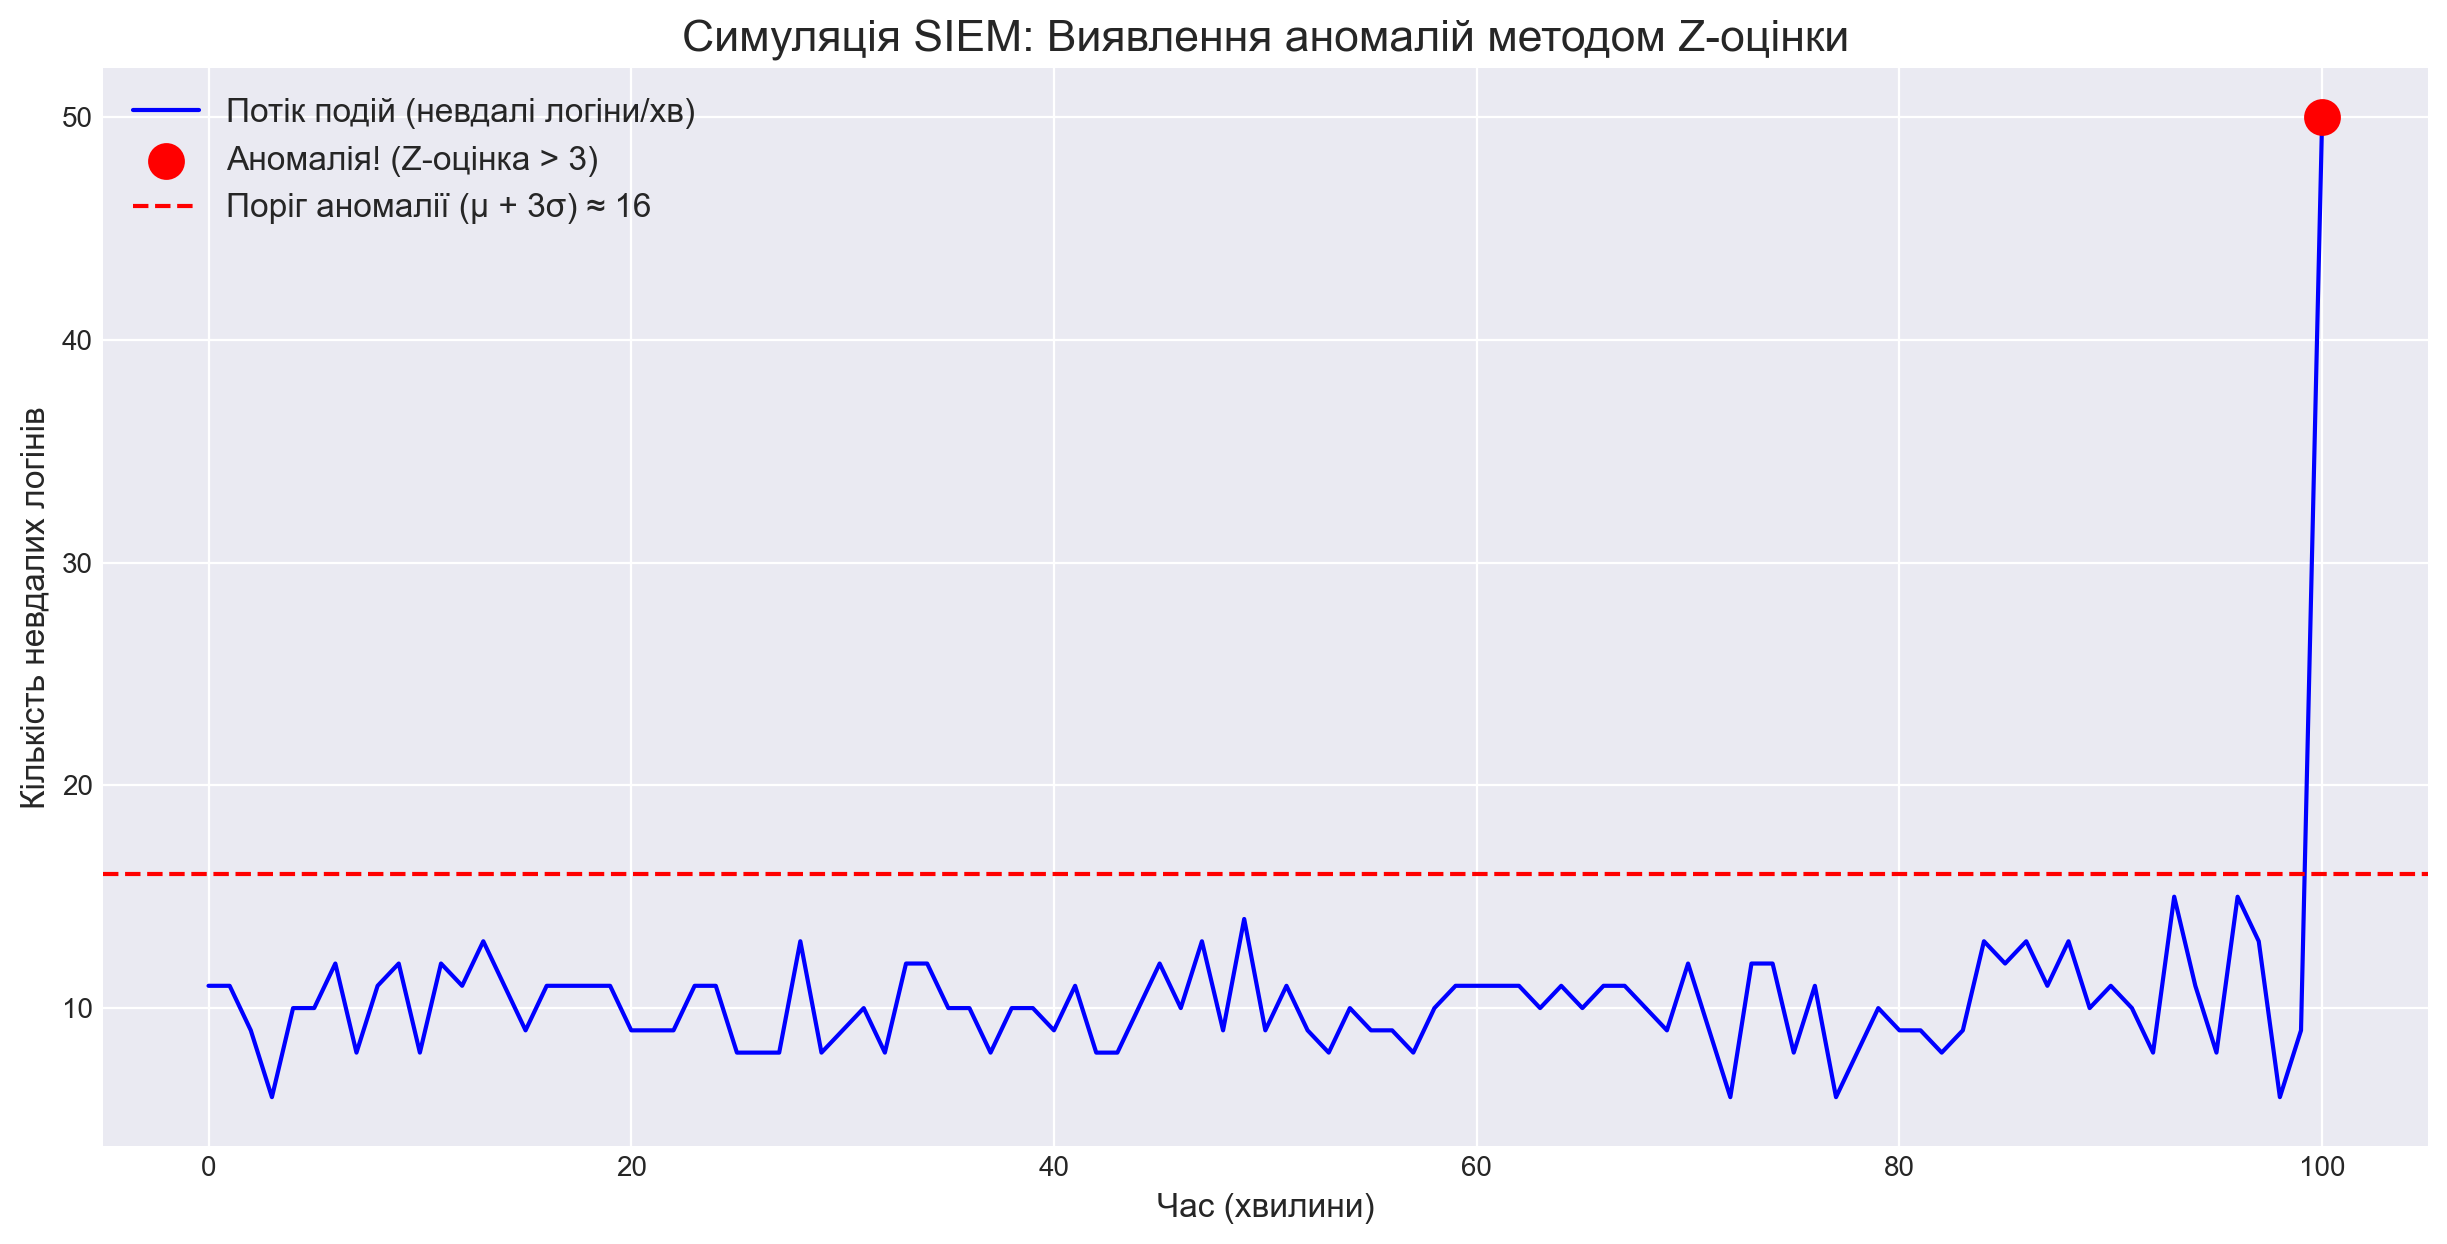

In [9]:
# Готуємо дані для графіка
plt.figure(figsize=(15, 7)) # Розмір графіка
time_axis = np.arange(len(full_data_stream)) # Вісь часу (хвилини)

# Малюємо основний потік даних
plt.plot(time_axis, full_data_stream, label='Потік подій (невдалі логіни/хв)', color='blue', zorder=1)

# Виділяємо аномалії червоним кольором
plt.scatter(
    anomaly_indices, 
    full_data_stream[anomaly_indices], 
    color='red', 
    s=150,  # Розмір маркера
    zorder=2, 
    label=f'Аномалія! (Z-оцінка > 3)'
)

# Додаємо порогову лінію (μ + 3σ)
threshold_line = mu + (3 * sigma)
plt.axhline(y=threshold_line, color='red', linestyle='--', label=f'Поріг аномалії (μ + 3σ) ≈ {threshold_line:.0f}')

# Оформлення графіка
plt.title('Симуляція SIEM: Виявлення аномалій методом Z-оцінки', fontsize=16)
plt.xlabel('Час (хвилини)', fontsize=12)
plt.ylabel('Кількість невдалих логінів', fontsize=12)
plt.legend(fontsize=12)
plt.show()